In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.session()

AttributeError: module 'tensorflow' has no attribute 'session'

In [3]:
# 创建常量op
m1 = tf.constant([[3,3]])
m2 = tf.constant([[2],[3]])
product = tf.matmul(m1,m2)

In [4]:
type(product)

tensorflow.python.framework.ops.Tensor

In [5]:
product

<tf.Tensor 'MatMul:0' shape=(1, 1) dtype=int32>

In [6]:
sess = tf.Session()

result = sess.run(product)

In [7]:
sess.close()

In [ ]:
result

In [ ]:
result.shape

In [ ]:
type(result)

In [8]:
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[15]]


In [ ]:
type(product)

In [9]:
x = tf.Variable([1,2])
a = tf.constant([3,3])
sub = tf.subtract(x,a)
add = tf.add(x,a)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(sub))
    print(sess.run(add))

[-2 -1]
[4 5]


In [10]:
state = tf.Variable(0,name='counter')

new_value = tf.add(state,1)
update = tf.assign(state, new_value)
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(5):
        print(sess.run(update))
        print(update)
        print(sess.run(state))
        print(new_value)

0
1
Tensor("Assign:0", shape=(), dtype=int32_ref)
1
Tensor("Add_1:0", shape=(), dtype=int32)
2
Tensor("Assign:0", shape=(), dtype=int32_ref)
2
Tensor("Add_1:0", shape=(), dtype=int32)
3
Tensor("Assign:0", shape=(), dtype=int32_ref)
3
Tensor("Add_1:0", shape=(), dtype=int32)
4
Tensor("Assign:0", shape=(), dtype=int32_ref)
4
Tensor("Add_1:0", shape=(), dtype=int32)
5
Tensor("Assign:0", shape=(), dtype=int32_ref)
5
Tensor("Add_1:0", shape=(), dtype=int32)


In [ ]:
type(new_value)

In [11]:
input1 = tf.constant(2.0)
input2 = tf.constant(3.0)
input3 = tf.constant(5.0)

add = tf.add(input2, input3)
mul = tf.multiply(input1, add)

with tf.Session() as sess:
    result = sess.run([mul, add])
    print(result)

[16.0, 8.0]


In [12]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1:[7.0], input2:[2.0]}))

[14.]


In [14]:
import tensorflow as tf
import numpy as np

In [15]:
x_data = np.random.rand(100)
y_data = x_data*0.1 + 0.2

b = tf.Variable(0.)
k = tf.Variable(0.)
y = k*x_data + b

loss = tf.reduce_mean(tf.square(y_data-y))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if step%20 == 0:
            print(step, sess.run([k,b,loss]))

0 [0.053405743, 0.100079894, 0.015377262]
20 [0.10323638, 0.19826716, 8.407099e-07]
40 [0.101952456, 0.19895466, 3.0597263e-07]
60 [0.101177864, 0.19936937, 1.11355874e-07]
80 [0.100710586, 0.19961955, 4.0528022e-08]
100 [0.100428686, 0.19977048, 1.4750499e-08]
120 [0.10025862, 0.19986154, 5.368559e-09]
140 [0.100156, 0.19991648, 1.9533908e-09]
160 [0.10009411, 0.19994962, 7.108406e-10]
180 [0.10005678, 0.19996959, 2.5886648e-10]
200 [0.10003426, 0.19998166, 9.420507e-11]


In [16]:
import matplotlib.pyplot as plt

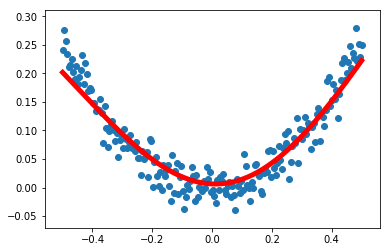

In [21]:
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis]
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32, [None,1])

Weight_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

Weight_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

loss = tf.reduce_mean(tf.square(y-prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(2000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
    
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()

In [ ]:
x = tf.Variable([1,2])

In [ ]:
a = tf.constant([3,3])

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets("MINIST_data", one_hot=True)

In [ ]:
# 每个批次的大小 每次放入100张图片
batch_size = 40
# 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size  # 整除

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

#创建神经网路

Weight_L1 = tf.Variable(tf.random_normal([784,200]))
biases_L1 = tf.Variable(tf.random_normal([1,200]))
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)
#L1 = tf.nn.softmax(Wx_plus_b_L1)
#L1 = Wx_plus_b_L1

#Weight_L2 = tf.Variable(tf.random_normal([200,10]))
Weight_L2 = tf.Variable(tf.random_normal([200,10]))
biases_L2 = tf.Variable(tf.random_normal([1,10]))
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2) + biases_L2

#b = tf.Variable(tf.zeros([1,10]))
L2 = tf.nn.tanh(Wx_plus_b_L2)


prediction = tf.nn.softmax(L2)


# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))

train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(300):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys})
            
        acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        print("Iter " +str(epoch) + " , testing accuracy " + str(acc))





In [ ]:
# 每个批次的大小 每次放入100张图片
batch_size = 40
# 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size  # 整除

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

#创建神经网路
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([1,10]))

prediction = tf.nn.softmax(tf.matmul(x,W) + b)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))

train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys})
            
        acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        print("Iter " +str(epoch) + " , testing accuracy " + str(acc))

In [ ]:
# 每个批次的大小 每次放入100张图片
batch_size = 40
# 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size  # 整除

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

#创建神经网路

Weight_L1 = tf.Variable(tf.random_normal([784,200]))
biases_L1 = tf.Variable(tf.random_normal([1,200]))
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1
#L1 = tf.nn.tanh(Wx_plus_b_L1)
#L1 = tf.nn.softmax(Wx_plus_b_L1)
L1 = Wx_plus_b_L1

#Weight_L2 = tf.Variable(tf.random_normal([200,10]))
Weight_L2 = tf.Variable(tf.random_normal([200,10]))
biases_L2 = tf.Variable(tf.random_normal([1,10]))
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2) + biases_L2

#b = tf.Variable(tf.zeros([1,10]))
#L2 = tf.nn.tanh(Wx_plus_b_L2)
L2 = Wx_plus_b_L2

prediction = tf.nn.softmax(L2)


# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))

train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(300):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys})
            
        acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        print("Iter " +str(epoch) + " , testing accuracy " + str(acc))


In [ ]:
# 成功代码 
#每个批次的大小 每次放入100张图片 这一段比较成功，因为初始化使用了truncated
batch_size = 40
# 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size  # 整除

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

#创建神经网路

Weight_L1 = tf.Variable(tf.truncated_normal([784,20], stddev=0.1))
biases_L1 = tf.Variable(tf.zeros([1,20])+0.1)
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)
#L1 = tf.nn.softmax(Wx_plus_b_L1)
#L1 = Wx_plus_b_L1

#Weight_L2 = tf.Variable(tf.random_normal([20,10]))
Weight_L2 = tf.Variable(tf.truncated_normal([20,10], stddev=0.1))
biases_L2 = tf.Variable(tf.zeros([1,10]) + 0.1)
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2) + biases_L2
#L2 = Wx_plus_b_L2
#b = tf.Variable(tf.zeros([1,10]))
L2 = tf.nn.tanh(Wx_plus_b_L2)


prediction = tf.nn.softmax(L2)


# 二次代价函数
#loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=prediction))

train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(400):
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys})
            
        #acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        #print("Iter " +str(epoch) + " , testing accuracy " + str(acc))
        test_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
        train_acc = sess.run(accuracy, feed_dict={x:mnist.train.images, y:mnist.train.labels})
        print("Iter " +str(epoch) + " , testing accuracy " + str(test_acc) + "   training accuracy" + str(train_acc))


In [ ]:
# 成功
# 造出了98%的识别率。 较大网络，学习率递降。
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MINIST_data", one_hot=True)

# 每个批次的大小 每次放入100张图片
batch_size = 100
# 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size  # 整除

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
lr = tf.Variable(0.001, dtype = tf.float32)

#创建神经网路

Weight_L1 = tf.Variable(tf.truncated_normal([784,500], stddev=0.1))
biases_L1 = tf.Variable(tf.zeros([1,500]) + 0.1)
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)
L1_drop = tf.nn.dropout(L1, keep_prob)

Weight_L2 = tf.Variable(tf.truncated_normal([500,300], stddev=0.1))
biases_L2 = tf.Variable(tf.zeros([1,300]) + 0.1)
Wx_plus_b_L2 = tf.matmul(L1_drop, Weight_L2) + biases_L2
L2 = tf.nn.tanh(Wx_plus_b_L2)
L2_drop = tf.nn.dropout(L2, keep_prob)

Weight_L3 = tf.Variable(tf.truncated_normal([300,100], stddev=0.1))
biases_L3 = tf.Variable(tf.zeros([1,100]) + 0.1)
Wx_plus_b_L3 = tf.matmul(L2_drop, Weight_L3) + biases_L3
L3 = tf.nn.tanh(Wx_plus_b_L3)
L3_drop = tf.nn.dropout(L3, keep_prob)

Weight_L4 = tf.Variable(tf.truncated_normal([100,10], stddev=0.1))
biases_L4 = tf.Variable(tf.zeros([1,10]) + 0.1)
Wx_plus_b_L4 = tf.matmul(L3_drop, Weight_L4) + biases_L4


prediction = tf.nn.softmax(Wx_plus_b_L4)


# 二次代价函数
#loss = tf.reduce_mean(tf.square(y-prediction))
# 交叉熵代价函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=prediction))

train_step = tf.train.AdamOptimizer(lr).minimize(loss)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(31):
        sess.run(tf.assign(lr, 0.001*(0.95**epoch)))
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys, keep_prob:1.0})
            
        test_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels, keep_prob:1.0})
        train_acc = sess.run(accuracy, feed_dict={x:mnist.train.images, y:mnist.train.labels, keep_prob:1.0})
        print("Iter " +str(epoch) + " , testing accuracy " + str(test_acc) + "training accuracy" + str(train_acc))

In [ ]:
# 成功输出变量的片段
import tensorflow as tf;
A = tf.Variable(tf.random_normal([1,5]) + 0.1, dtype=tf.float32)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(A))

In [ ]:
# 这一段解释了程序里的疑惑。 这里直接矩阵相加，只会是横着拍上去！！竖着的，不知道怎么搞
mx = tf.Variable(tf.zeros([3, 2]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([2]) , dtype=tf.float32)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(mx))
    print(sess.run(b))
    result = mx + b
    print(sess.run(result))

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MINIST_data", one_hot=True)


# 每个批次的大小 每次放入100张图片
batch_size = 100
# 计算一共有多少个批次
n_batch = mnist.train.num_examples // batch_size  # 整除

with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, 784], name = 'x-input')
    y = tf.placeholder(tf.float32, [None, 10], name = 'y-input')
    keep_prob = tf.placeholder(tf.float32)
    lr = tf.Variable(0.001, dtype = tf.float32)

with tf.name_scope('layer'):
    with tf.name_scope('weight'):
        Weight_L1 = tf.Variable(tf.truncated_normal([784,10], stddev=0.1), name='W')
    with tf.name_scope('biases'):
        biases_L1 = tf.Variable(tf.zeros([1,10]) + 0.1, name='b')
    with tf.name_scope('wx_plus_b'):
        Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1
    with tf.name_scope('softmax'):
        L1 = tf.nn.tanh(Wx_plus_b_L1)
    

L1_drop = tf.nn.dropout(L1, keep_prob)

#创建神经网路

Weight_L1 = tf.Variable(tf.truncated_normal([784,10], stddev=0.1))
biases_L1 = tf.Variable(tf.zeros([1,10]) + 0.1)
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)
L1_drop = tf.nn.dropout(L1, keep_prob)

Weight_L2 = tf.Variable(tf.truncated_normal([10,10], stddev=0.1))
biases_L2 = tf.Variable(tf.zeros([1,10]) + 0.1)
Wx_plus_b_L2 = tf.matmul(L1_drop, Weight_L2) + biases_L2
L2 = tf.nn.tanh(Wx_plus_b_L2)
L2_drop = tf.nn.dropout(L2, keep_prob)

Weight_L3 = tf.Variable(tf.truncated_normal([10,10], stddev=0.1))
biases_L3 = tf.Variable(tf.zeros([1,10]) + 0.1)
Wx_plus_b_L3 = tf.matmul(L2_drop, Weight_L3) + biases_L3
L3 = tf.nn.tanh(Wx_plus_b_L3)
L3_drop = tf.nn.dropout(L3, keep_prob)

Weight_L4 = tf.Variable(tf.truncated_normal([10,10], stddev=0.1))
biases_L4 = tf.Variable(tf.zeros([1,10]) + 0.1)
Wx_plus_b_L4 = tf.matmul(L3_drop, Weight_L4) + biases_L4


prediction = tf.nn.softmax(Wx_plus_b_L4)


# 二次代价函数
#loss = tf.reduce_mean(tf.square(y-prediction))
# 交叉熵代价函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=prediction))

train_step = tf.train.AdamOptimizer(lr).minimize(loss)

init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('logs/', sess.graph)
    for epoch in range(1):
        sess.run(tf.assign(lr, 0.001*(0.95**epoch)))
        for batch in range(n_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys, keep_prob:1.0})
            
        test_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels, keep_prob:1.0})
        train_acc = sess.run(accuracy, feed_dict={x:mnist.train.images, y:mnist.train.labels, keep_prob:1.0})
        print("Iter " +str(epoch) + " , testing accuracy " + str(test_acc) + "training accuracy" + str(train_acc))